#Bank Loan Analysis


#####Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#####Uploading file into colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving financial_loan.xlsx to financial_loan (1).xlsx


##### reading the file

In [ ]:
df = pd.read_excel("financial_loan.xlsx")
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [ ]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


#####Metadata of the data

In [ ]:
print(df.shape)
print(df.shape[0])
print(df.shape[1])
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

(38576, 24)
38576
24
No. of rows:  38576
No. of columns:  24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [ ]:
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [ ]:
df.describe()


,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


##KPIs

#####1. Total Loan Applications

In [ ]:
Total_Loan_Applications = df.shape[0]
print("Total Loan Applications: ", Total_Loan_Applications)

Total Loan Applications:  38576


In [ ]:
Total_loan_applications = df['id'].count()
print("Total loan applications are ",Total_loan_applications )

Total loan applications are  38576


#####MTD Loan Applications

In [ ]:
last_issue_date = df['issue_date'].max()
last_year = last_issue_date.year
last_month = last_issue_date.month
mtd_date = df[(df['issue_date'].dt.year == last_year) & (df['issue_date'].dt.month == last_month)]
mtd_loan_applications = mtd_date['id'].count()
print(f"MTD_Loan_applications for ({last_issue_date.strftime("%B %Y")}): {mtd_loan_applications} ")

MTD_Loan_applications for (December 2021): 4314 


#####2. Total Funded Amount

In [ ]:
Total_funded_amount = df['loan_amount'].sum()
Total_funded_amount_millions = Total_funded_amount/1000000
print("Total funded amount is ${:.2f}M". format(Total_funded_amount_millions))

Total funded amount is $435.76M


###### MTD Funded Amount

In [ ]:
last_issue_date = df['issue_date'].max()
last_year = last_issue_date.year
last_month = last_issue_date.month

mtd_date = df[(df["issue_date"].dt.year == last_year) & (df["issue_date"].dt.month == last_month)]
mtd_funded_amount = mtd_date["loan_amount"].sum()
mtd_funded_amount_millions = mtd_funded_amount/1000000
print(f"MTD Funded amount for ({last_issue_date.strftime("%B %Y")}): ${mtd_funded_amount_millions:.2f}M")



MTD Funded amount for (December 2021): $53.98M


#####3. Total Amount received

In [ ]:
Total_amt_received = df["total_payment"].sum()
Total_amt_received_millions = Total_amt_received/1000000
print("Total amount received is ${:.2f}M".format(Total_amt_received_millions))


Total amount received is $473.07M


###### MTD Amount Received

In [ ]:
last_date = df['issue_date'].max()
last_year = last_date.year
last_month = last_date.month
mtd_date = df[(df['issue_date'].dt.year == last_year) & (df['issue_date'].dt.month == last_month )]
mtd_amount_received = mtd_date["total_payment"].sum()
mtd_amount_received_millions = mtd_amount_received/1000000
print(f" Total MTD Amount received for {last_date.strftime("%B %Y")}: ${mtd_amount_received_millions:.2f}M")


 Total MTD Amount received for December 2021: $58.07M


#####4. Average Interest rate

In [ ]:
avg_interest_rate  = df["int_rate"].mean()*100
print(f"Average interest rate is {avg_interest_rate:.2f}%")

Average interest rate is 12.05%


##### 5. Average Debt to Income Ratio (DTI)

In [ ]:
Average_DTI = df['dti'].mean()*100
print(f"Average DTI is {Average_DTI:.2f}")

Average DTI is 13.33


#####6.a Good Loans Metrics

In [ ]:
good_loans = df[df['loan_status'].isin(["Fully Paid" , "Current"])]

total_loan_applications = df['id'].count()

total_good_loans = good_loans['id'].count()
good_loans_percentage = (total_good_loans/total_loan_applications)*100

total_good_loan_funded_amt = good_loans["loan_amount"].sum()
total_good_loan_funded_amt_millions = good_loans["loan_amount"].sum()/1000000

total_good_loan_received_amount = good_loans['total_payment'].sum()
total_good_loan_received_amount_millions = good_loans['total_payment'].sum()/1000000

print("Total loan applications are ",total_loan_applications)
print("Total good loan applications are ",(total_good_loans))
print("Total good loans percentage is: {:.2f}% ".format(good_loans_percentage))
print("Total funded amount for good loans(in Millions) is ${:.2f}M".format(total_good_loan_funded_amt_millions))
print("Total received amount from good loans(in Millions) is ${:.2f}M".format(total_good_loan_received_amount_millions))




Total loan applications are  38576
Total good loan applications are  33243
Total good loans percentage is: 86.18% 
Total funded amount for good loans(in Millions) is $370.22M
Total received amount from good loans(in Millions) is $435.79M


##### 6.b. Bad Loan Metrics

In [ ]:
Total_loan_applications = df['id'].count()

bad_loans = df[df['loan_status'].isin(['Charged Off'])]

Total_bad_loans = bad_loans['id'].count()
Total_bad_loans_percentage = (Total_bad_loans/Total_loan_applications)*100

Bad_loan_funded_amt = bad_loans['loan_amount'].sum()
Bad_loan_funded_amt_millions = Bad_loan_funded_amt/1000000

Bad_loan_received_amt = bad_loans['total_payment'].sum()
Bad_loan_received_amt_millions = Bad_loan_received_amt/1000000

print("Total loan applications are ",Total_loan_applications)
print("Number of bad loan applications as ",Total_bad_loans )
print("Bad loan applications percentage is {:.2f}%".format(Total_bad_loans_percentage))
print("Total funded amount for bad loans(in Millions) is ${:.2f}M".format(Bad_loan_funded_amt_millions))
print("Total received amount from bad loans(in Millions) is ${:.2f}M".format(Bad_loan_received_amt_millions))





Total loan applications are  38576
Number of bad loan applications as  5333
Bad loan applications percentage is 13.82%
Total funded amount for bad loans(in Millions) is $65.53M
Total received amount from bad loans(in Millions) is $37.28M


###CHARTS


######## we have to create 6 charts for the metrics: Total loan applications, Total funded amount, Total received amount

#####1.a Monthly trends by issue date : line or Area chart - Total Funded Amount - To identify seasonality and long term trends in lending activivties

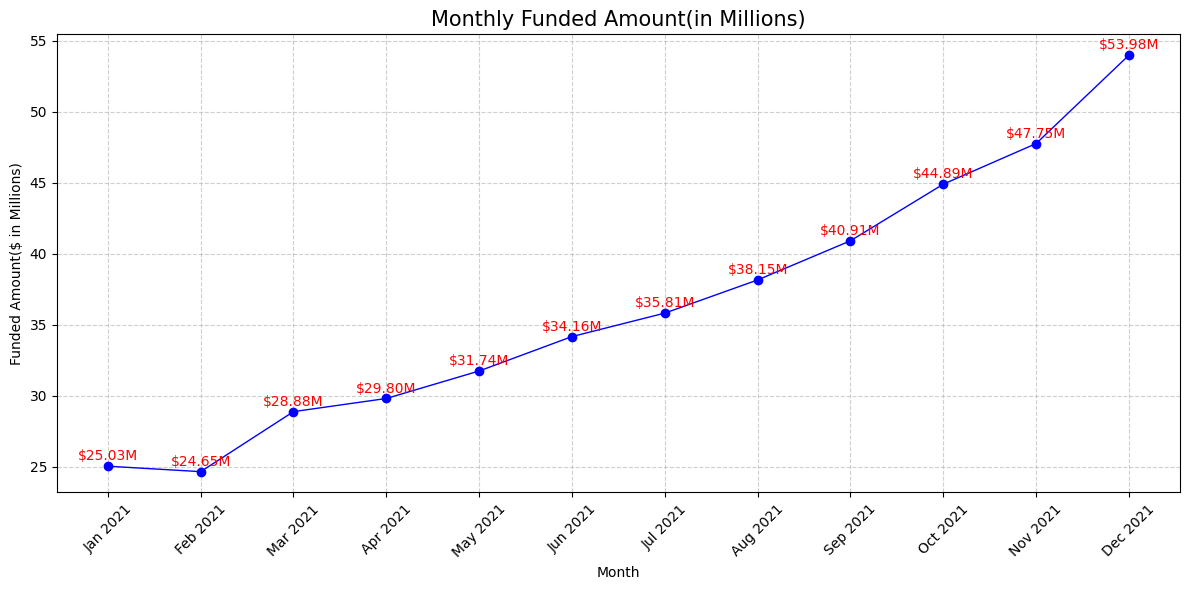

In [ ]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name = lambda X: X['issue_date'].dt.strftime("%b %Y"))
    .groupby('month_name', sort = False)['loan_amount'].sum()
    .div(1000000)
    .reset_index(name = "loan_amount_millions")
)


plt.figure(figsize = (12,6))
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], marker = 'o', color = 'blue', linewidth = 1)

for i, row in monthly_funded.iterrows():
  plt.text(
      i,
      row['loan_amount_millions']+0.2, f"${row['loan_amount_millions']:.2f}M",
           ha = 'center', va = 'bottom', fontsize = 10, rotation = 0, color = 'red'
           )

plt.title("Monthly Funded Amount(in Millions)", fontsize = 15)
plt.xlabel("Month")
plt.ylabel("Funded Amount($ in Millions)")
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

######for area chart just add plt.fillbetween as in below

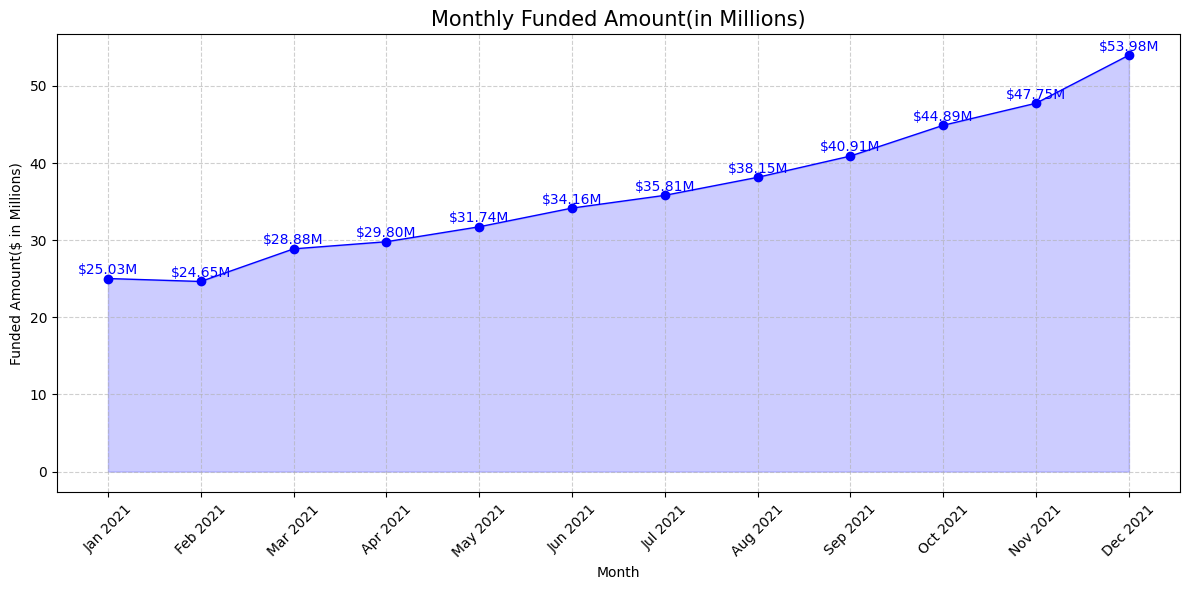

In [ ]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name = lambda X: X['issue_date'].dt.strftime("%b %Y"))
    .groupby('month_name', sort = False)['loan_amount'].sum()
    .div(1000000)
    .reset_index(name = "loan_amount_millions")
)


plt.figure(figsize = (12,6))
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], marker = 'o', color = 'blue', linewidth = 1)
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color = 'blue', alpha =0.2)

for i, row in monthly_funded.iterrows():
  plt.text(
      i,
      row['loan_amount_millions']+0.2, f"${row['loan_amount_millions']:.2f}M",
           ha = 'center', va = 'bottom', fontsize = 10, rotation = 0, color = 'blue', alpha = 1
           )

plt.title("Monthly Funded Amount(in Millions)", fontsize = 15)
plt.xlabel("Month")
plt.ylabel("Funded Amount($ in Millions)")
plt.xticks(rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

#####1.b Monthly trends by issue date : line or Area chart for Total Amount Received - To identify seasonality and long term trends in lending activivties

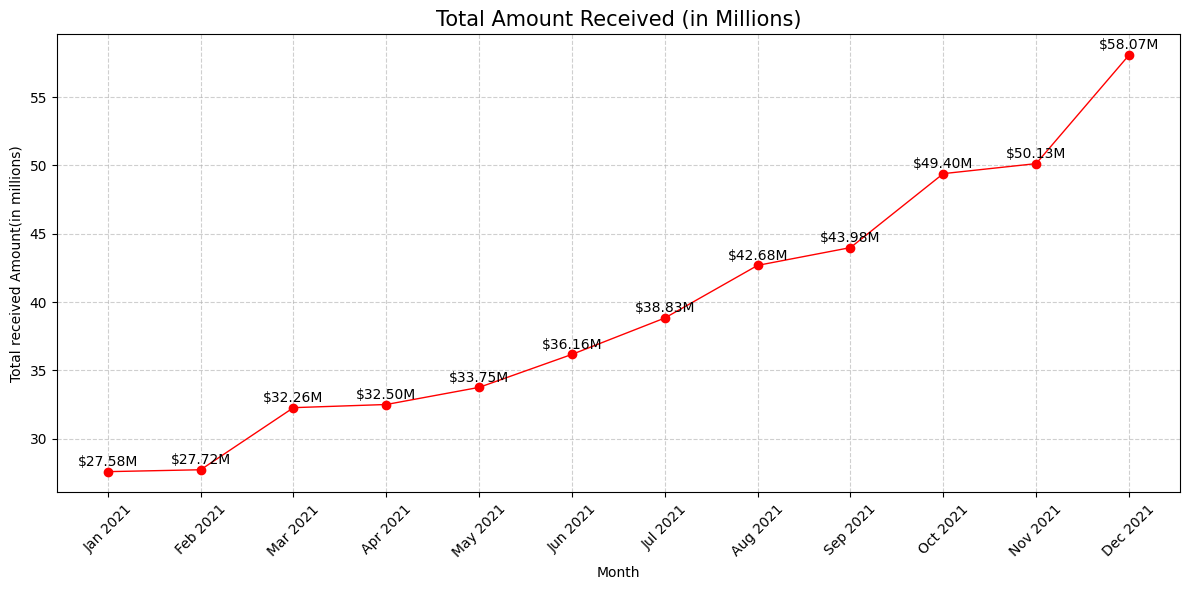

In [ ]:
monthly_received= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime("%b %Y"))
    .groupby("month_name", sort = False)['total_payment'].sum()
    .div(1000000)
    .reset_index(name = "total_received_millions")
)

plt.figure(figsize=(12,6))
plt.plot(monthly_received['month_name'], monthly_received['total_received_millions'],marker = 'o', color = 'red', linewidth = 1)

for i,row in monthly_received.iterrows():
  plt.text(i, row['total_received_millions']+0.2, f"${row['total_received_millions']:.2f}M",
           ha = "center", va = 'bottom', fontsize = 10, color = "black", alpha = 1, rotation = 0 )

plt.title("Total Amount Received (in Millions)", fontsize = 15, color = "black")
plt.xlabel("Month")
plt.ylabel("Total received Amount(in millions)")
plt.xticks(rotation=45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()




#####1.c Monthly trends by issue date : line or Area chart for Total Amount Received - To identify seasonality and long term trends in lending activivties

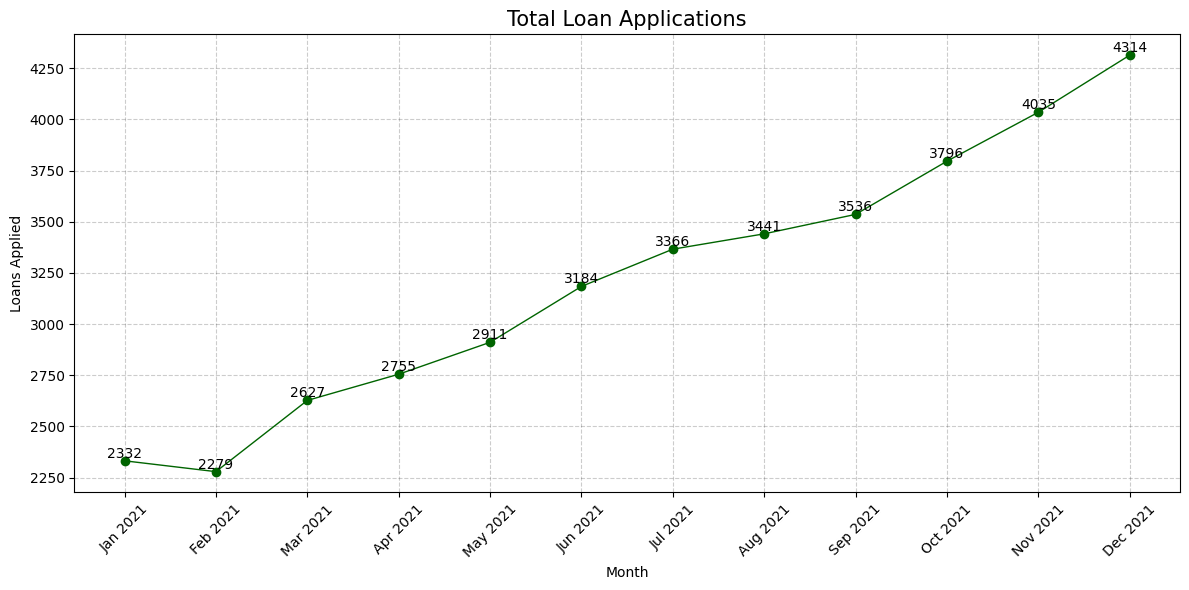

In [ ]:
monthly_applications= (
    df.sort_values('issue_date')
    .assign(month_name= lambda x: x['issue_date'].dt.strftime("%b %Y"))
    .groupby("month_name", sort = False)['id'].count()
    .reset_index(name = "total_loan_applications")
)

plt.figure(figsize=(12,6))
plt.plot(monthly_applications['month_name'], monthly_applications['total_loan_applications'],marker = 'o', color = 'darkgreen', linewidth = 1)

for i,row in monthly_applications.iterrows():
  plt.text(i, row['total_loan_applications']+0.2, f"{row['total_loan_applications']}",
           ha = "center", va = 'bottom', fontsize = 10, color = "black", alpha = 1, rotation = 0 )

plt.title("Total Loan Applications", fontsize = 15, color = "black")
plt.xlabel("Month")
plt.ylabel("Loans Applied")
plt.xticks(rotation=45)
plt.grid(True, linestyle = '--',color = "black", alpha = 0.2)
plt.tight_layout()
plt.show()




#####2.a Regional analysis by state - Bar chart - Total Funded amount

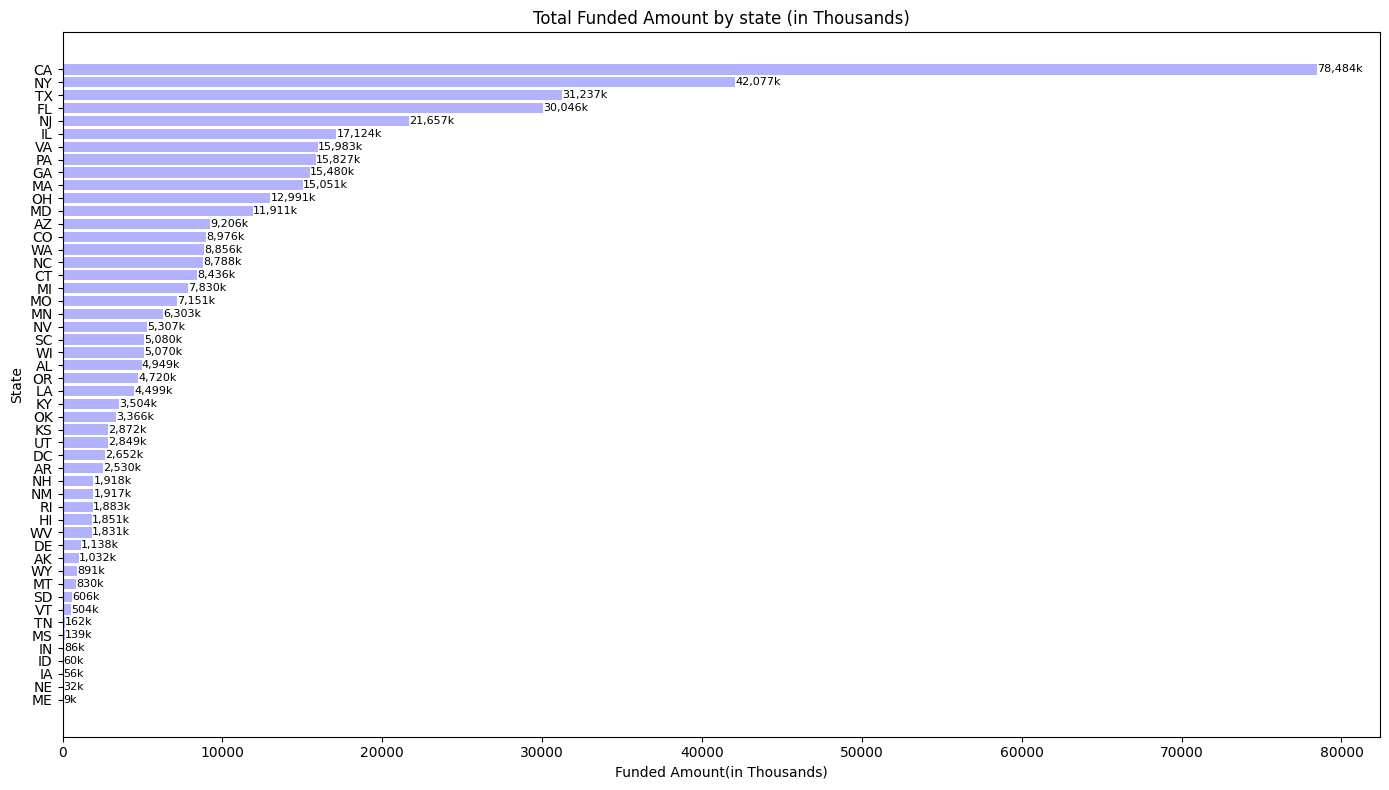

In [ ]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize = (14,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color = 'blue', alpha = 0.3)

for bar in bars:
  width =bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height() /2, f'{width:,.0f}k', va = 'center',fontsize = 8)


plt.title('Total Funded Amount by state (in Thousands)')
plt.xlabel('Funded Amount(in Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


#####2.b Regional analysis by state - Bar chart - Total amount received

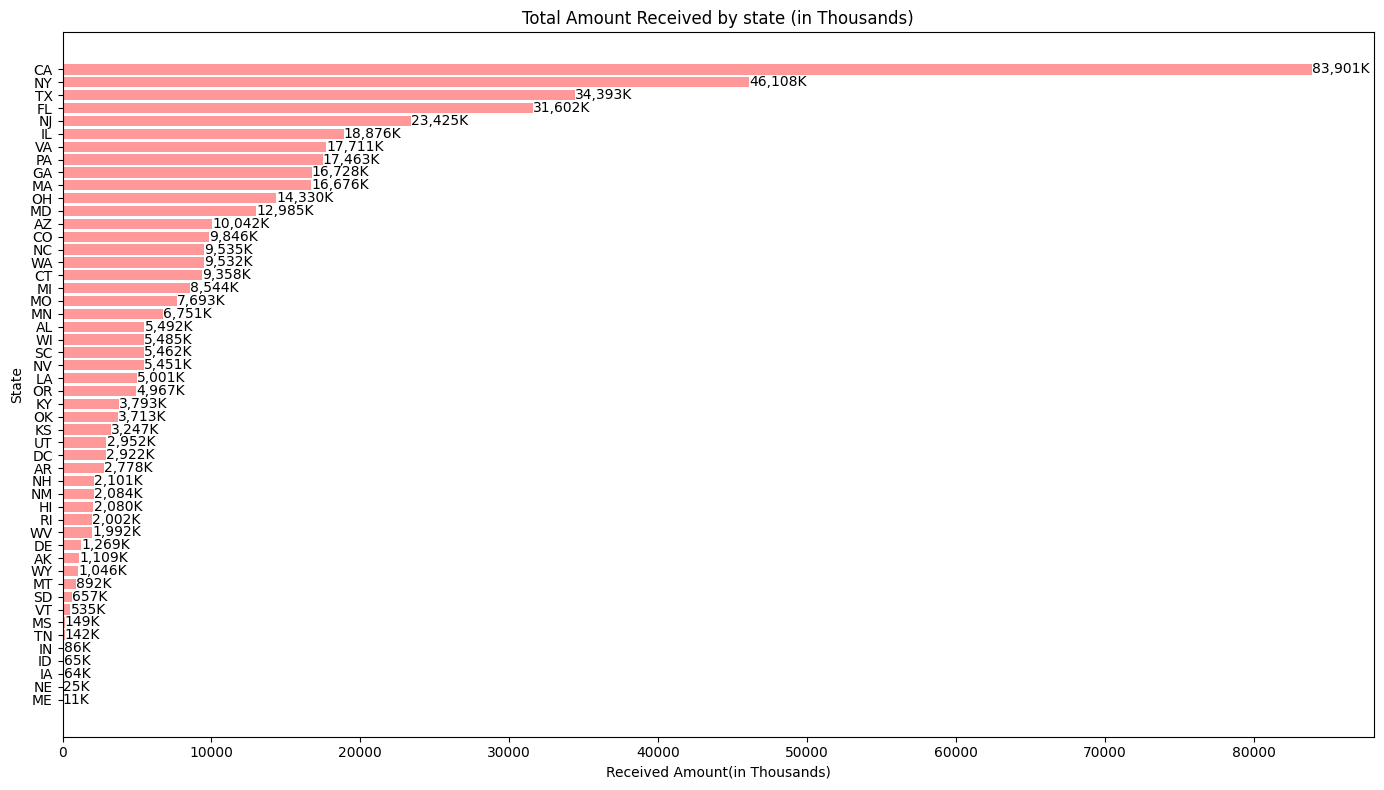

In [ ]:
received_amount_bystate = df.groupby('address_state')['total_payment'].sum().sort_values(ascending = True)
received_amount_bystate_thousands = received_amount_bystate / 1000

plt.figure(figsize = (14,8))
bars = plt.barh(received_amount_bystate_thousands.index, received_amount_bystate_thousands.values, color = "red", alpha = 0.4)

for bar in bars:
  width = bar.get_width()
  plt.text(width+10, bar.get_y()+ bar.get_height()/2, f'{width:,.0f}K',va = 'center', color = "black", alpha = 1)

plt.title('Total Amount Received by state (in Thousands)')
plt.xlabel('Received Amount(in Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#####2.c Regional analysis by state - Bar chart - Total loan applications

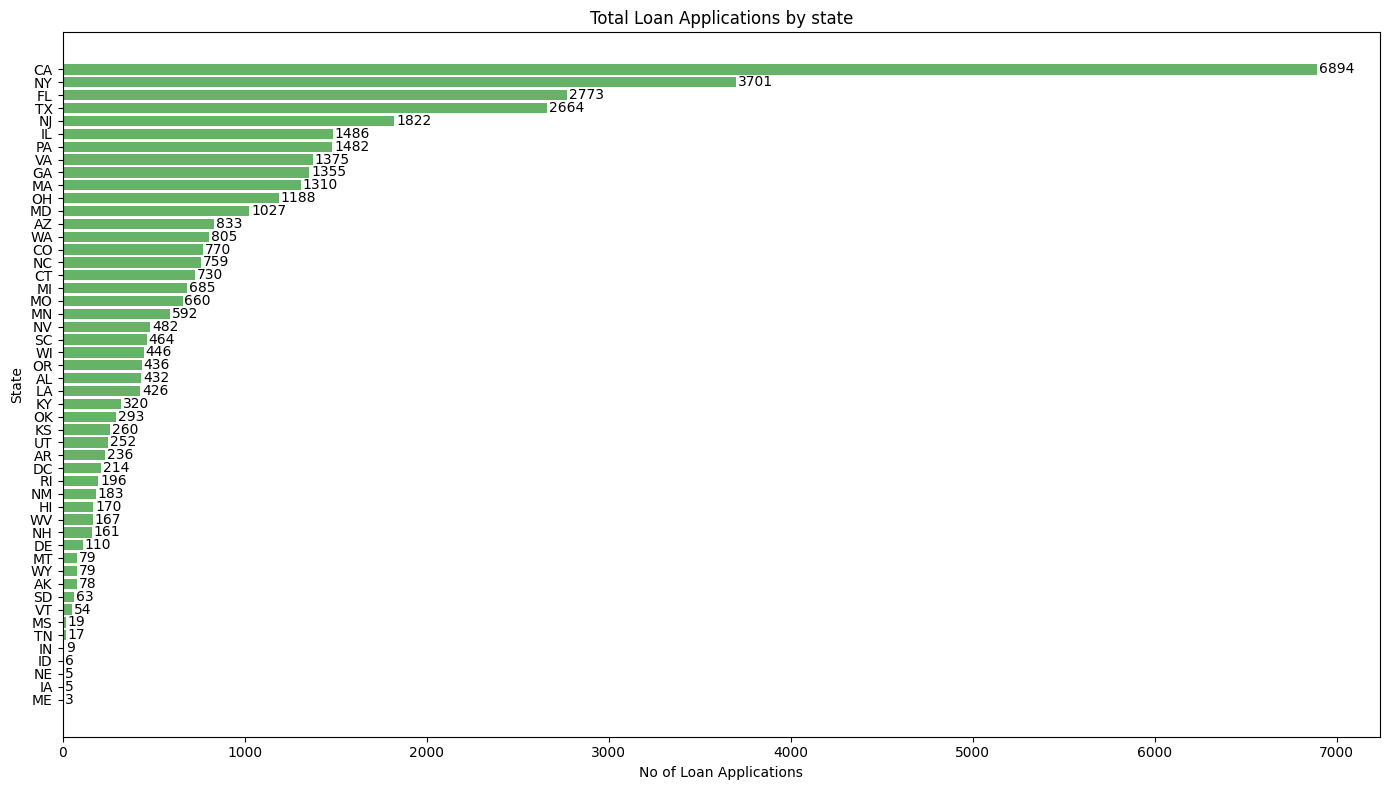

In [ ]:
total_loan_applications_bystate = df.groupby('address_state')['id'].count().sort_values(ascending = True)

plt.figure(figsize = (14,8))
bars = plt.barh(total_loan_applications_bystate.index, total_loan_applications_bystate.values, color = "green", alpha = 0.6)

for bar in bars:
  width = bar.get_width()
  plt.text(width+10, bar.get_y()+bar.get_height()/2, width, va = 'center', color = 'black', alpha = 1 )

plt.title('Total Loan Applications by state')
plt.xlabel('No of Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

##### 3.a Loan Term Analysis - Total Funded Amount

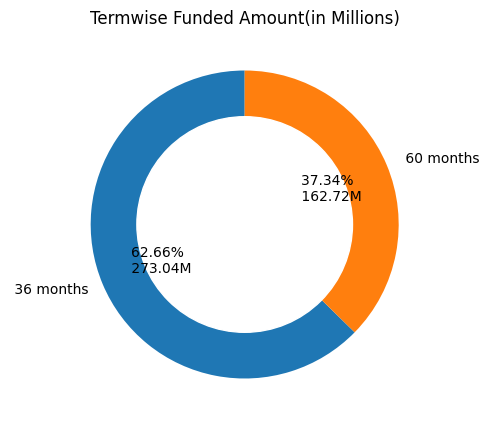

In [ ]:
termwise_funded_amount = df.groupby('term')['loan_amount'].sum()
termwise_funded_amount_millions = termwise_funded_amount/1000000

plt.figure(figsize = (5,5))
plt.pie(termwise_funded_amount_millions, labels = termwise_funded_amount_millions.index,
        autopct = lambda p: f'{p:.2f}% \n {p* sum(termwise_funded_amount_millions)/100 :.2f}M',
        startangle = 90, wedgeprops ={'width': 0.4}
        )

plt.gca().add_artist(
    plt.Circle((0, 0), 0.70, color='white'))

plt.title('Termwise Funded Amount(in Millions)')
plt.show()

##### 3.b Loan Term Analysis - Total Amount received

<function matplotlib.pyplot.show(close=None, block=None)>

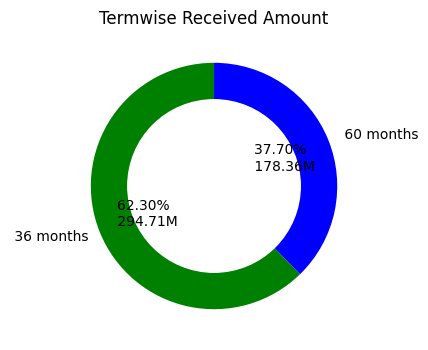

In [ ]:
Termwise_received_amount = df.groupby('term')['total_payment'].sum()
Termwise_received_amount_millions = Termwise_received_amount/1000000

plt.figure(figsize = (4,4))
plt.pie(Termwise_received_amount_millions,labels = Termwise_received_amount_millions.index,
        colors = ['green', 'blue'],
        autopct = lambda p: f'{p:.2f}% \n {p*sum(Termwise_received_amount_millions)/100:.2f}M',
        startangle = 90, wedgeprops = {'width':0.4},
        )

plt.gca().add_artist( plt.Circle((0,0), 0.70, color = "White"))
plt.title('Termwise Received Amount')
plt.show

######## for above pie chart the % and value position can be adjusted as below
pctdistance = 0.85,
        labeldistance = 0.85,
        textprops = {'color': 'black', 'fontsize' : 9}

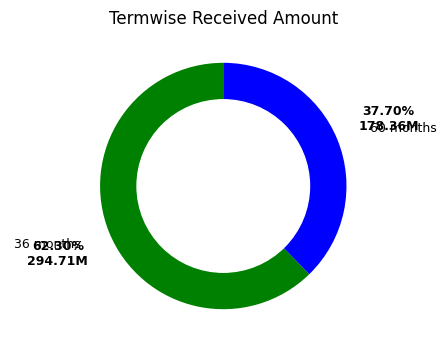

In [ ]:
# Aggregate data
Termwise_received_amount = df.groupby('term')['total_payment'].sum()
Termwise_received_amount_millions = Termwise_received_amount / 1000000

# Create figure and axes
fig, ax = plt.subplots(figsize=(4, 4))

# Draw donut chart
wedges, texts = ax.pie(
    Termwise_received_amount_millions,
    labels=Termwise_received_amount_millions.index,
    colors=['green', 'blue'],
    startangle=90,
    wedgeprops={'width': 0.4},
    labeldistance=1.25,
    textprops={'color': 'black', 'fontsize': 9}
)

# Add donut hole
ax.add_artist(plt.Circle((0, 0), 0.70, color='white'))

# Calculate total
total = Termwise_received_amount_millions.sum()

# Add values outside the donut
for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = 1.45 * np.cos(np.deg2rad(angle))
    y = 1.45 * np.sin(np.deg2rad(angle))

    value = Termwise_received_amount_millions.iloc[i]
    percent = value / total * 100

    ax.text(
        x, y,
        f'{percent:.2f}%\n{value:.2f}M',
        ha='center',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='black'
    )

# Title
ax.set_title('Termwise Received Amount')

plt.show()


#####3.c Loan Term Analysis - Donut chart - Total loan applications

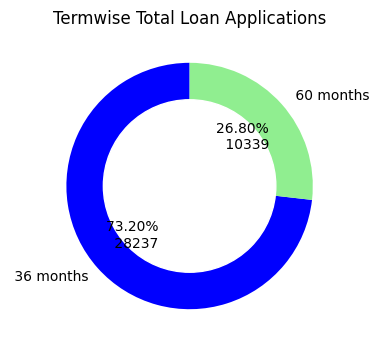

In [ ]:
Termwise_loan_applications = df.groupby('term')['id'].count()

plt.figure(figsize = (4,4))
plt.pie(Termwise_loan_applications,labels = Termwise_loan_applications.index,
        colors = ['blue', 'lightgreen'],
        autopct = lambda p: f'{p:.2f}% \n {p*sum(Termwise_loan_applications)/100:.0f}',
        startangle = 90, wedgeprops = {'width':0.4},
        )

plt.gca().add_artist( plt.Circle((0,0), 0.70, color = "White"))
plt.title('Termwise Total Loan Applications')
plt.show()

#####4.a Employment length analysis - Bar chart - Total funded Amount

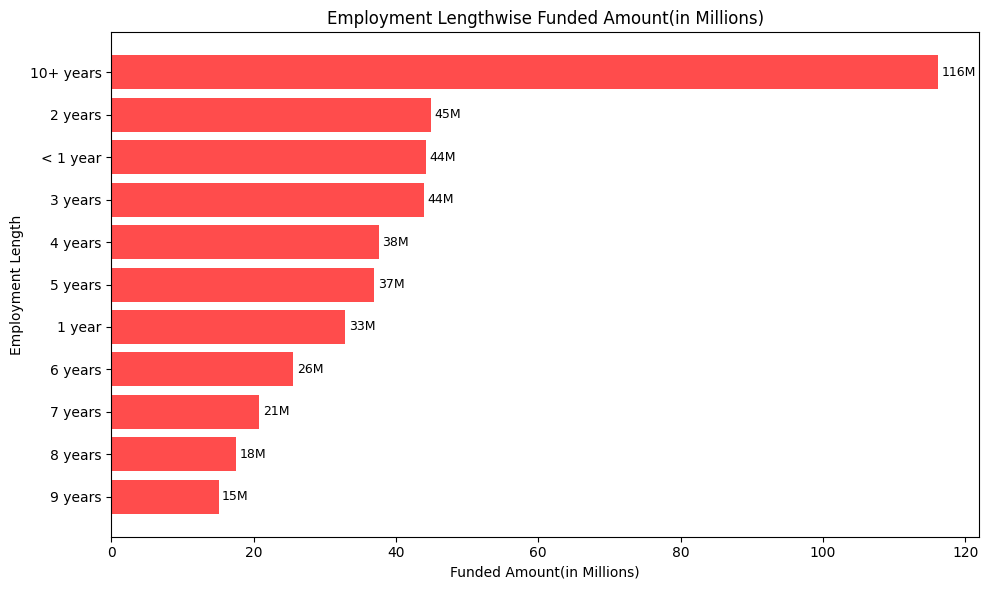

In [ ]:
emp_lengthwise_funded_amount = df.groupby('emp_length')['loan_amount'].sum().sort_values(ascending = True)
emp_lengthwise_funded_amount_Millions = emp_lengthwise_funded_amount/1000000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_lengthwise_funded_amount_Millions.index,
                emp_lengthwise_funded_amount_Millions.values, color = 'red', alpha = 0.7)
for bar in bars:
  width = bar.get_width()
  plt.text(width+0.5, bar.get_y()+bar.get_height()/2, f'{width:,.0f}M', va = 'center', fontsize = 9)

plt.title("Employment Lengthwise Funded Amount(in Millions)")
plt.xlabel("Funded Amount(in Millions)")
plt.ylabel("Employment Length")
plt.tight_layout()
plt.show()

##### 4. b Employee length Analysis - bar chart - Total received amount

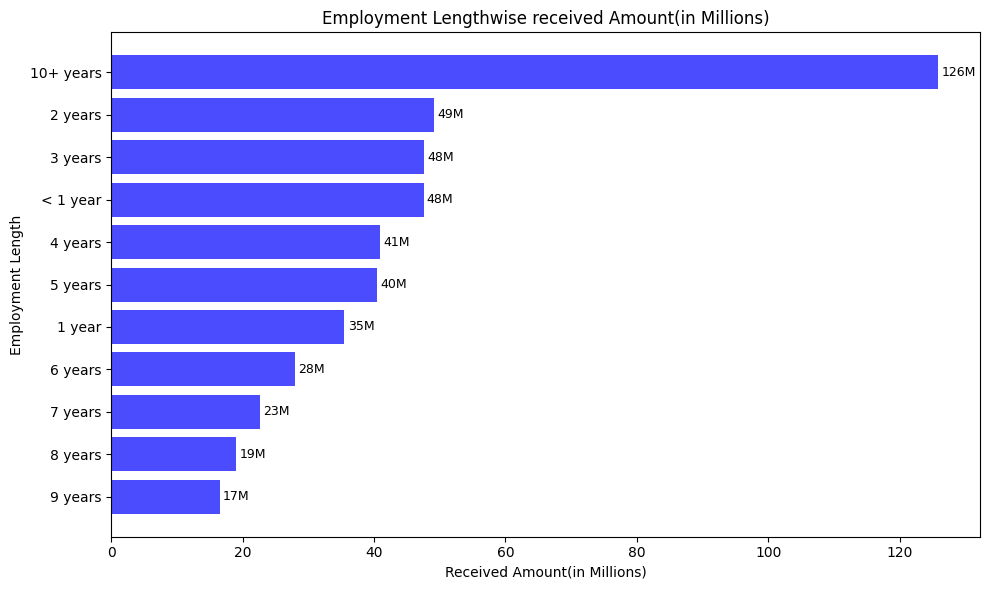

In [ ]:
emp_lengthwise_received_amount = df.groupby('emp_length')['total_payment'].sum().sort_values(ascending = True)
emp_lengthwise_received_amount_Millions = emp_lengthwise_received_amount/1000000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_lengthwise_received_amount_Millions.index,
                emp_lengthwise_received_amount_Millions.values, color = 'blue', alpha = 0.7)
for bar in bars:
  width = bar.get_width()
  plt.text(width+0.5, bar.get_y()+bar.get_height()/2, f'{width:,.0f}M', va = 'center', fontsize = 9)

plt.title("Employment Lengthwise received Amount(in Millions)")
plt.xlabel("Received Amount(in Millions)")
plt.ylabel("Employment Length")
plt.tight_layout()
plt.show()

##### 4. c Employee length Analysis - bar chart - Total Loan Applications

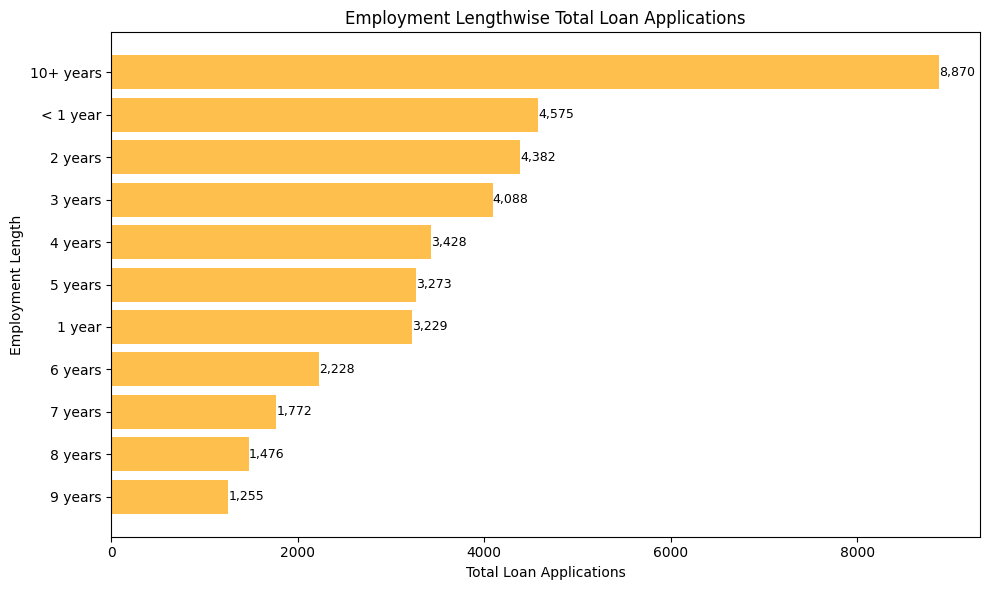

In [ ]:
emp_lengthwise_total_applications = df.groupby('emp_length')['id'].count().sort_values(ascending = True)

plt.figure(figsize = (10,6))
bars = plt.barh(emp_lengthwise_total_applications.index,
                emp_lengthwise_total_applications.values, color = 'orange', alpha = 0.7)
for bar in bars:
  width = bar.get_width()
  plt.text(width+0.5, bar.get_y()+bar.get_height()/2, f'{width:,.0f}', va = 'center', fontsize = 9)

plt.title("Employment Lengthwise Total Loan Applications")
plt.xlabel("Total Loan Applications")
plt.ylabel("Employment Length")
plt.tight_layout()
plt.show()

#####5.a Loan Purpose Analyis - Bar Chart - Total Funded Amount

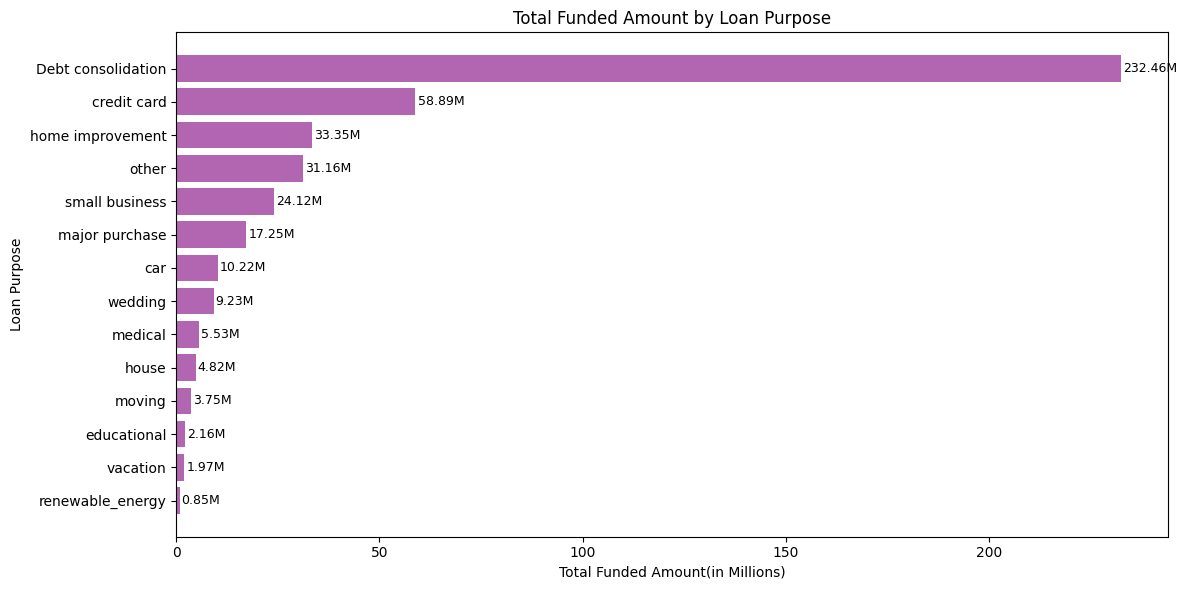

In [ ]:
Loan_purpose_Funded_amount = df.groupby('purpose')['loan_amount'].sum().sort_values(ascending = True)
Loan_purpose_Funded_amount_Millions = Loan_purpose_Funded_amount/1000000

plt.figure(figsize = (12,6))
bars = plt.barh(Loan_purpose_Funded_amount_Millions.index,
                Loan_purpose_Funded_amount_Millions.values, color = "purple", alpha = 0.6)
for bar in bars:
  width = bar.get_width()
  plt.text(width+0.5, bar.get_y()+bar.get_height()/2, f'{width:.2f}M',va = 'center', fontsize =9)

plt.title("Total Funded Amount by Loan Purpose")
plt.xlabel("Total Funded Amount(in Millions)")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()

#####5.b Loan Purpose Analyis - Bar Chart - Total Received Amount

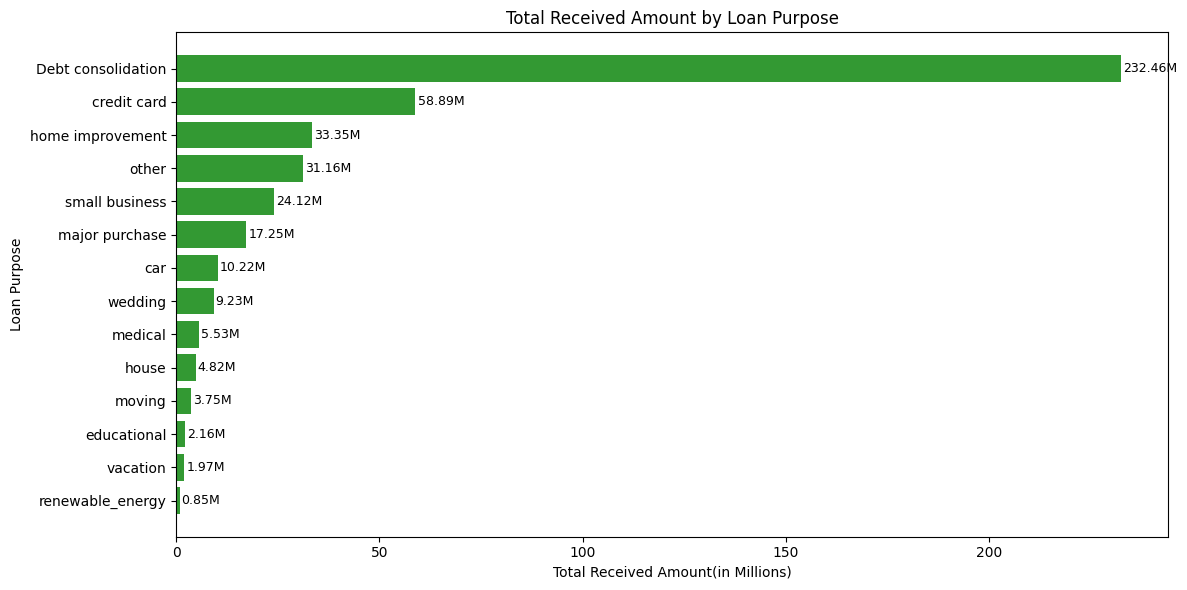

In [ ]:
Loan_purpose_received_amount = df.groupby('purpose')['total_payment'].sum().sort_values(ascending = True)
Loan_purpose_received_amount_Millions = Loan_purpose_Funded_amount/1000000

plt.figure(figsize = (12,6))
bars = plt.barh(Loan_purpose_received_amount_Millions.index,
                Loan_purpose_received_amount_Millions.values, color = "green", alpha = 0.8)
for bar in bars:
  width = bar.get_width()
  plt.text(width+0.5, bar.get_y()+bar.get_height()/2, f'{width:.2f}M',va = 'center', fontsize =9)

plt.title("Total Received Amount by Loan Purpose")
plt.xlabel("Total Received Amount(in Millions)")
plt.ylabel("Loan Purpose")
plt.tight_layout()
plt.show()

#####5.c Loan Purpose Analyis - Bar Chart - Total Loan Applications

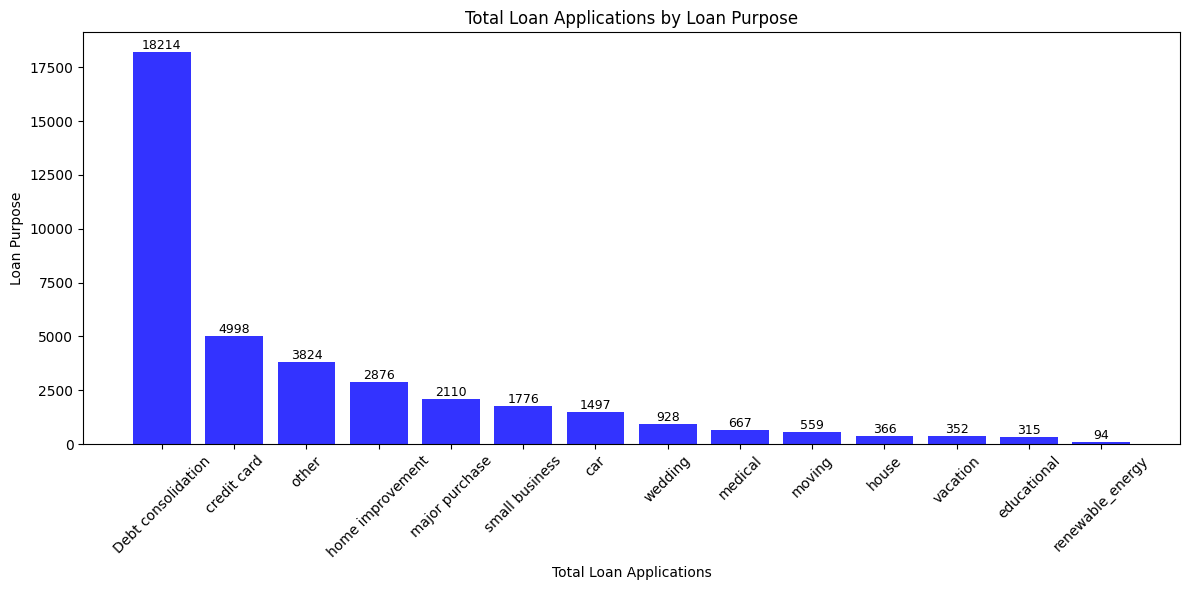

In [ ]:
Loan_purpose_Total_Applications = df.groupby('purpose')['id'].count().sort_values(ascending = False)

plt.figure(figsize = (12,6))
bars = plt.bar(Loan_purpose_Total_Applications.index,
                Loan_purpose_Total_Applications.values, color = "blue", alpha = 0.8)
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x()+bar.get_width()/2, height+5,  f'{height:.0f}',
           va = 'bottom', ha = 'center', fontsize =9, color = "black")

plt.title("Total Loan Applications by Loan Purpose")
plt.xlabel("Total Loan Applications")
plt.ylabel("Loan Purpose")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#####6.a Home Ownership Analysis - Tree Map - Total Funded Amount

In [ ]:
Funded_amount_Ownership_Millions = (
    df.groupby('home_ownership')['loan_amount']
      .sum()
      .sort_values(ascending=True)
      .div(1_000_000)
      .reset_index(name='Funded_amount_Ownership_Millions')
)

fig = px.treemap(
    Funded_amount_Ownership_Millions, path = ['home_ownership'],
    values = 'Funded_amount_Ownership_Millions',
    color = 'Funded_amount_Ownership_Millions',
    color_continuous_scale = 'Blues',
    title = 'Total Funded Amount by Home Ownership(in Millions)'
)

fig.show()

#####6.b Home Ownership Analysis - Tree Map - Total received Amount

In [ ]:
received_amount_Ownership_Millions = (
    df.groupby('home_ownership')['total_payment']
      .sum()
      .div(1_000_000)
      .reset_index(name='received_amount_Ownership_Millions')
)

fig = px.treemap(
    received_amount_Ownership_Millions, path = ['home_ownership'],
    values = 'received_amount_Ownership_Millions',
    color = 'received_amount_Ownership_Millions',
    color_continuous_scale = 'Blues',
    title = 'Received Amount by Home Ownership(in Millions)'
)
fig.update_traces(
    texttemplate=
    "<b>%{label}</b><br>"
    "%{value:.2f}M<br>"
    "%{percentParent:.2f}%"
)

fig.show()

#####6.c Home ownsership wise total loan applications

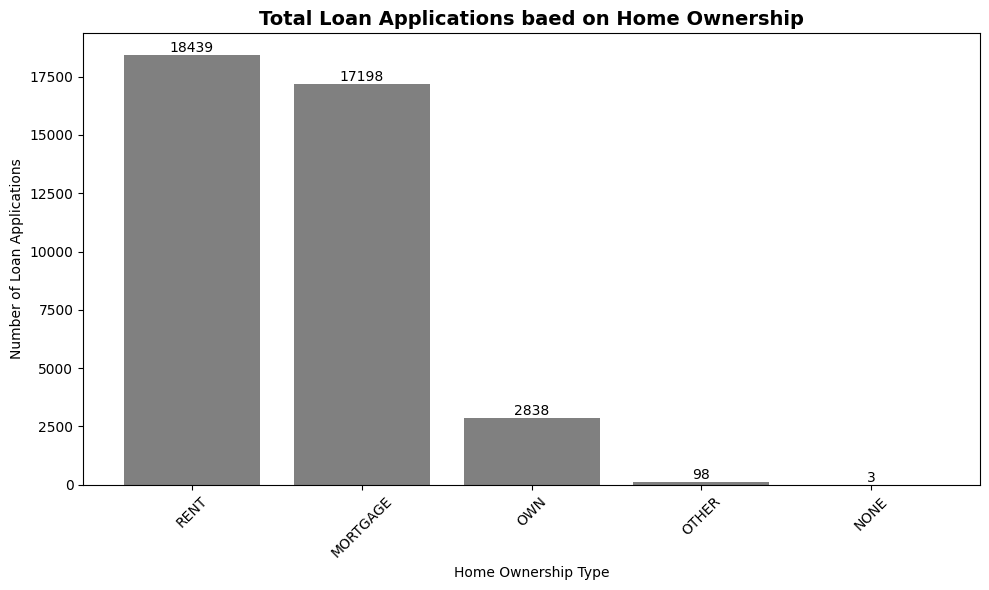

In [ ]:
loan_applications_homwownership = df.groupby('home_ownership')['id'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(
    loan_applications_homwownership.index,
    loan_applications_homwownership.values,
    color='grey',
    alpha=1
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.2,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title("Total Loan Applications baed on Home Ownership", fontsize=14, fontweight = 'bold')
plt.xlabel("Home Ownership Type")
plt.ylabel("Number of Loan Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
